In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import collections as clt
import matplotlib.pyplot as plt
import pickle

In [9]:
plt.rcParams["figure.figsize"] = (10,7) #defining size of plots

In [2]:
df = pd.read_csv('reviews_full_v5.csv')
df

,User,Date,Year,Month,Release,Band,Score,Link,Album_link,Review_title,Genre,Text,Sentiment
0,SpookyApparition,July 11 2002,2002,7,Chaosphere,Meshuggah,82,https://www.metal-archives.com/reviews/Meshugg...,https://www.metal-archives.com/albums/Meshugga...,Technical metal at it's finest.,technical thrash metal|math metal|progressive ...,I originally bought Chaosphere in late 2000......,0.9728
1,SpookyApparition,July 14 2002,2002,7,Necroticism_-_Descanting_the_Insalubrious,Carcass,88,https://www.metal-archives.com/reviews/Carcass...,https://www.metal-archives.com/albums/Carcass/...,Carcass at their finest.,grindcore|melodic death metal,A midpoint between Carcass' early grind albums...,0.8479
2,MarkRyan,July 15 2002,2002,7,Angels_Fall_First,Nightwish,90,https://www.metal-archives.com/reviews/Nightwi...,https://www.metal-archives.com/albums/Nightwis...,On par with their other stuff...,symphonic power metal,"I'm not hard-core into metal at all, really, b...",0.9951
3,Fear,July 16 2002,2002,7,Dark_Genesis,Iced_Earth,87,https://www.metal-archives.com/reviews/Iced_Ea...,https://www.metal-archives.com/albums/Iced_Ear...,Brilliance in Repackaging,heavy metal|us power metal,"This is not a new album, but in fact, five alb...",0.9976
4,Esoteric,July 16 2002,2002,7,A_Night_at_the_Opera,Blind_Guardian,70,https://www.metal-archives.com/reviews/Blind_G...,https://www.metal-archives.com/albums/Blind_Gu...,Somewhat Disappointing,power metal,I've been trying for months to come up with an...,0.5494
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93429,6CORPSE6GRINDER6,June 30 2017,2017,6,Chemical_Assault,Violator,85,https://www.metal-archives.com/reviews/Violato...,https://www.metal-archives.com/albums/Violator...,"Take your life back, in the pit!",thrash metal,I don't have any issues with the retro-thrash ...,0.9976
93430,6CORPSE6GRINDER6,June 30 2017,2017,6,Path_of_Fire,Aeon,65,https://www.metal-archives.com/reviews/Aeon/Pa...,https://www.metal-archives.com/albums/Aeon/Pat...,As mediocre as it's predecessor,death metal,Aeon’s brand of death metal is supposed to be ...,-0.9758
93431,6CORPSE6GRINDER6,June 30 2017,2017,6,Violent_Mosh,Violator,80,https://www.metal-archives.com/reviews/Violato...,https://www.metal-archives.com/albums/Violator...,Officers are dirtier than the criminals they c...,thrash metal,This band was so important for the thrash meta...,0.9911
93432,Wacke,June 30 2017,2017,6,Resurrection,Chimaira,89,https://www.metal-archives.com/reviews/Chimair...,https://www.metal-archives.com/albums/Chimaira...,What doesn't kill us makes us stronger.,hard rock,Chimaira is arguably the most overlooked and/o...,0.9947


In [3]:
B = nx.Graph()
posScore = 75
albums = set()
users = set()
for i,row in df.iterrows():
    album = row['Release'] + 'A' #to differentiate
    user = row['User']
    if row['Score'] >= posScore:
        albums.add(album)
        users.add(user)
        B.add_edge(album,user)

In [4]:
B.number_of_nodes(), len(albums), len(users)

(38739, 30100, 8639)

In [5]:
#nx.write_gpickle(B,'bipartite_albums.p')

In [12]:
G = nx.Graph()
for album1 in albums:
    for user in B.adj[album1]:
        for album2 in B.adj[user]:
            if album1 < album2:
                if not G.has_edge(album1,album2):
                    G.add_edge(album1, album2, weight = 0, users = set())
                G[album1][album2]['weight'] += 1
                G[album1][album2]['users'].add(user)
nx.write_gpickle(G,'network_albums.p')

In [13]:
G.number_of_nodes()

28822

(array([7.107309e+06, 1.401800e+04, 2.287000e+03, 5.330000e+02,
        1.320000e+02, 8.500000e+01, 1.000000e+01, 5.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <a list of 10 Patch objects>)

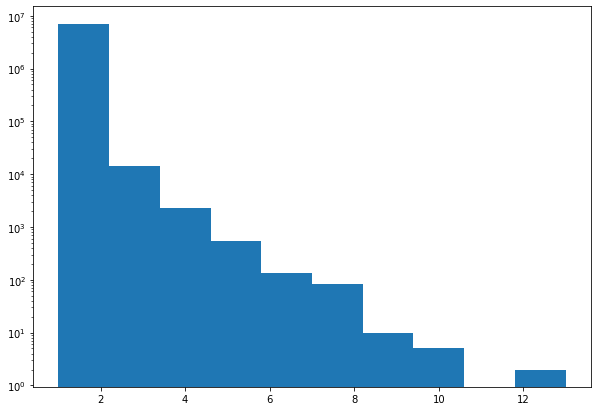

In [14]:
plt.hist(list(nx.get_edge_attributes(G,'weight').values()), log = True)

In [17]:
for u,v in G.edges():
    if G[u][v]['weight'] >= 12:
        print(u,v)
        print(G[u][v]['users'])

Ride_the_LightningA Kill_%27Em_AllA
{'DawnoftheShred', 'megadeth1986', 'caspian', 'kluseba', 'BlackMetal213', 'raZe', 'grain_silo', 'hells_unicorn', 'Orbitball', 'TableofHELL', 'OlympicSharpshooter', 'Thrash_Maniac', 'Ibanezmancons'}
ParanoidA Black_SabbathA
{'Doominance', 'westknife', 'radiohater', 'erickg13', 'Face_your_fear_79', 'hells_unicorn', 'brocashelm', 'OlympicSharpshooter', 'Brainded_Binky', 'Reaper', 'Cosmic_Equilibrium', 'Warthur'}


In [32]:
df

,User,Date,Year,Month,Release,Band,Score,Link,Album_link,Review_title,Genre,Text,Sentiment,Band_Genre
0,SpookyApparition,July 11 2002,2002,7,Chaosphere,Meshuggah,82,https://www.metal-archives.com/reviews/Meshugg...,https://www.metal-archives.com/albums/Meshugga...,Technical metal at it's finest.,technical thrash metal|math metal|progressive ...,I originally bought Chaosphere in late 2000......,0.9728,Groove|Thrash
1,SpookyApparition,July 14 2002,2002,7,Necroticism_-_Descanting_the_Insalubrious,Carcass,88,https://www.metal-archives.com/reviews/Carcass...,https://www.metal-archives.com/albums/Carcass/...,Carcass at their finest.,grindcore|melodic death metal,A midpoint between Carcass' early grind albums...,0.8479,Grindcore|Death
2,MarkRyan,July 15 2002,2002,7,Angels_Fall_First,Nightwish,90,https://www.metal-archives.com/reviews/Nightwi...,https://www.metal-archives.com/albums/Nightwis...,On par with their other stuff...,symphonic power metal,"I'm not hard-core into metal at all, really, b...",0.9951,Symphonic|Power
3,Fear,July 16 2002,2002,7,Dark_Genesis,Iced_Earth,87,https://www.metal-archives.com/reviews/Iced_Ea...,https://www.metal-archives.com/albums/Iced_Ear...,Brilliance in Repackaging,heavy metal|us power metal,"This is not a new album, but in fact, five alb...",0.9976,Thrash|Power
4,Esoteric,July 16 2002,2002,7,A_Night_at_the_Opera,Blind_Guardian,70,https://www.metal-archives.com/reviews/Blind_G...,https://www.metal-archives.com/albums/Blind_Gu...,Somewhat Disappointing,power metal,I've been trying for months to come up with an...,0.5494,Speed|Power
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93429,6CORPSE6GRINDER6,June 30 2017,2017,6,Chemical_Assault,Violator,85,https://www.metal-archives.com/reviews/Violato...,https://www.metal-archives.com/albums/Violator...,"Take your life back, in the pit!",thrash metal,I don't have any issues with the retro-thrash ...,0.9976,Thrash
93430,6CORPSE6GRINDER6,June 30 2017,2017,6,Path_of_Fire,Aeon,65,https://www.metal-archives.com/reviews/Aeon/Pa...,https://www.metal-archives.com/albums/Aeon/Pat...,As mediocre as it's predecessor,death metal,Aeon’s brand of death metal is supposed to be ...,-0.9758,Death
93431,6CORPSE6GRINDER6,June 30 2017,2017,6,Violent_Mosh,Violator,80,https://www.metal-archives.com/reviews/Violato...,https://www.metal-archives.com/albums/Violator...,Officers are dirtier than the criminals they c...,thrash metal,This band was so important for the thrash meta...,0.9911,Thrash
93432,Wacke,June 30 2017,2017,6,Resurrection,Chimaira,89,https://www.metal-archives.com/reviews/Chimair...,https://www.metal-archives.com/albums/Chimaira...,What doesn't kill us makes us stronger.,hard rock,Chimaira is arguably the most overlooked and/o...,0.9947,Metalcore|Groove


In [62]:
df.head(20)

,User,Date,Year,Month,Release,Band,Score,Link,Album_link,Review_title,Genre,Text,Sentiment,Band_Genre,Combined_Genre
0,SpookyApparition,July 11 2002,2002,7,Chaosphere,Meshuggah,82,https://www.metal-archives.com/reviews/Meshugg...,https://www.metal-archives.com/albums/Meshugga...,Technical metal at it's finest.,technical thrash metal|math metal|progressive ...,I originally bought Chaosphere in late 2000......,0.9728,groove metal|thrash metal,technical thrash metal|math metal|progressive ...
1,SpookyApparition,July 14 2002,2002,7,Necroticism_-_Descanting_the_Insalubrious,Carcass,88,https://www.metal-archives.com/reviews/Carcass...,https://www.metal-archives.com/albums/Carcass/...,Carcass at their finest.,grindcore|melodic death metal,A midpoint between Carcass' early grind albums...,0.8479,grindcore|death metal,grindcore|melodic death metal
2,MarkRyan,July 15 2002,2002,7,Angels_Fall_First,Nightwish,90,https://www.metal-archives.com/reviews/Nightwi...,https://www.metal-archives.com/albums/Nightwis...,On par with their other stuff...,symphonic power metal,"I'm not hard-core into metal at all, really, b...",0.9951,symphonic metal|power metal,symphonic power metal
3,Fear,July 16 2002,2002,7,Dark_Genesis,Iced_Earth,87,https://www.metal-archives.com/reviews/Iced_Ea...,https://www.metal-archives.com/albums/Iced_Ear...,Brilliance in Repackaging,heavy metal|us power metal,"This is not a new album, but in fact, five alb...",0.9976,thrash metal|power metal,heavy metal|us power metal
4,Esoteric,July 16 2002,2002,7,A_Night_at_the_Opera,Blind_Guardian,70,https://www.metal-archives.com/reviews/Blind_G...,https://www.metal-archives.com/albums/Blind_Gu...,Somewhat Disappointing,power metal,I've been trying for months to come up with an...,0.5494,speed metal|power metal,power metal
5,Demented666,July 18 2002,2002,7,Extension_of_the_Wish,Andromeda,100,https://www.metal-archives.com/reviews/Androme...,https://www.metal-archives.com/albums/Andromed...,A smashing debut.,progressive metal,Andromeda's Extension of the Wish- clearly one...,0.8619,progressive metal,progressive metal
6,Sicarius,July 20 2002,2002,7,Blackwater_Park,Opeth,85,https://www.metal-archives.com/reviews/Opeth/B...,https://www.metal-archives.com/albums/Opeth/Bl...,An Impressive Display of Compositional Power,extreme progressive metal,"To start off, I must say that I did not always...",0.9974,death metal|progressive metal,extreme progressive metal
7,Skyklad,July 20 2002,2002,7,The_Isle_of_Disenchantment,Psycroptic,85,https://www.metal-archives.com/reviews/Psycrop...,https://www.metal-archives.com/albums/Psycropt...,PSYCROPTIC - The Isle Of Disenchantment,technical death metal,PSYCROPTIC - The Isle Of Disenchantment (self ...,-0.9732,death metal,technical death metal
8,Skyklad,July 20 2002,2002,7,The_Fair_Bitch_Project,Absolute_Steel,75,https://www.metal-archives.com/reviews/Absolut...,https://www.metal-archives.com/albums/Absolute...,ABSOLUTE STEEL - The Fair Bitch Project,NaN,ABSOLUTE STEEL - The Fair Bitch Project (Edger...,0.9798,heavy metal,heavy metal
9,Skyklad,July 21 2002,2002,7,Realm_of_the_Dead,Purgation,85,https://www.metal-archives.com/reviews/Purgati...,https://www.metal-archives.com/albums/Purgatio...,PURGATION - Realm Of The Dead,NaN,PURGATION - Realm Of The Dead MCD(self release...,0.9694,doom metal,doom metal


In [63]:
df.to_csv('reviews_full_v7.csv', index = False)